# REopt Lite API Example

## Initialization

In [1]:
import urllib3
urllib3.disable_warnings()
%run utils.py

## Scenario Inputs (Post)

In [2]:
post = {"Scenario": {"Site": {
    "latitude": 34.5794343, "longitude": -118.11646129999997, #Palmdale, CA
    "LoadProfile": {
       "doe_reference_name": "RetailStore",
       "annual_kwh": 1000000
    },
    "ElectricTariff": {
        "urdb_label": "5bc7c01e5457a3ee6b3b43ef"
    }
}}}

## Optimized System

In [3]:
retail_store_results = reo_optimize(post)

main         INFO     Polling https://developer.nrel.gov/api/reopt/v1/job/d1e8a8f4-15e3-4a1a-8ebc-bea56c094a94/results/?api_key=yOODa4jmZy1q3Wd6lkQcne6izi3nq2YSIIlCQkOg for results with interval of 2s...


Response OK from https://developer.nrel.gov/api/reopt/v1/job/?api_key=yOODa4jmZy1q3Wd6lkQcne6izi3nq2YSIIlCQkOg.


In [ ]:
retail_store_results

## Comparing DOE Reference Buildings

In [5]:
doe_list = ['StripMall', 'Warehouse', 'Supermarket']

In [6]:
results_dict = dict()

for name in doe_list:
    newpost = post
    newpost['Scenario']['Site']["LoadProfile"]["doe_reference_name"] = name
    
    print('Beginning Scenario:', name)
    results = reo_optimize(newpost)
    results_dict[name] = results
    
    if results['outputs']['Scenario']['status'] != 'optimal':
        print('non-optimial solution')

Beginning Scenario: StripMall


main         INFO     Polling https://developer.nrel.gov/api/reopt/v1/job/1a1314f4-df4c-44ac-b249-4b08f642152b/results/?api_key=yOODa4jmZy1q3Wd6lkQcne6izi3nq2YSIIlCQkOg for results with interval of 2s...


Response OK from https://developer.nrel.gov/api/reopt/v1/job/?api_key=yOODa4jmZy1q3Wd6lkQcne6izi3nq2YSIIlCQkOg.
Beginning Scenario: Warehouse


main         INFO     Polling https://developer.nrel.gov/api/reopt/v1/job/367988b1-20a7-438f-9e91-edb58c064db2/results/?api_key=yOODa4jmZy1q3Wd6lkQcne6izi3nq2YSIIlCQkOg for results with interval of 2s...


Response OK from https://developer.nrel.gov/api/reopt/v1/job/?api_key=yOODa4jmZy1q3Wd6lkQcne6izi3nq2YSIIlCQkOg.
Beginning Scenario: Supermarket


main         INFO     Polling https://developer.nrel.gov/api/reopt/v1/job/6f0dc161-d7ff-4cc4-ad5f-9b17e8b1d3dc/results/?api_key=yOODa4jmZy1q3Wd6lkQcne6izi3nq2YSIIlCQkOg for results with interval of 2s...


Response OK from https://developer.nrel.gov/api/reopt/v1/job/?api_key=yOODa4jmZy1q3Wd6lkQcne6izi3nq2YSIIlCQkOg.


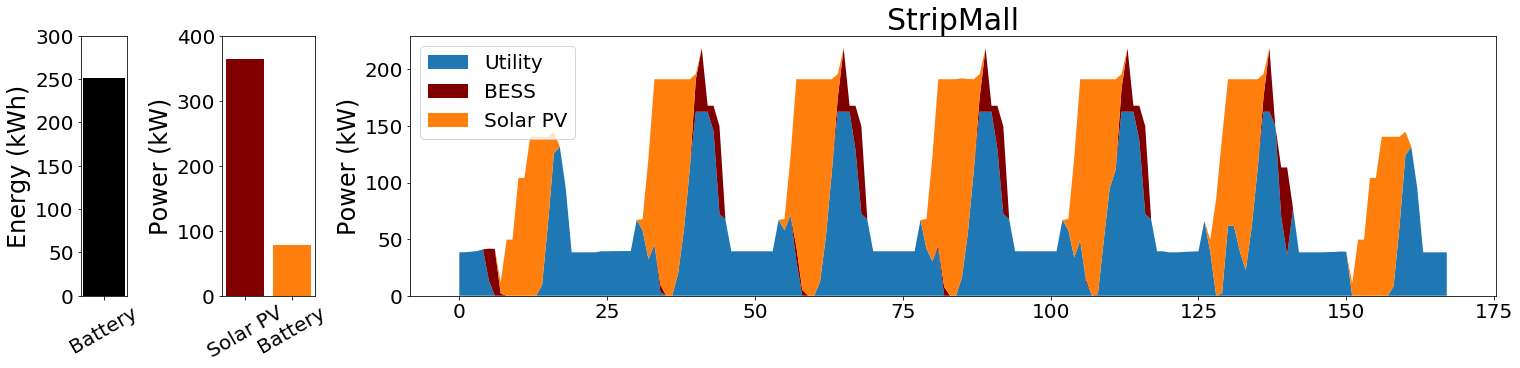

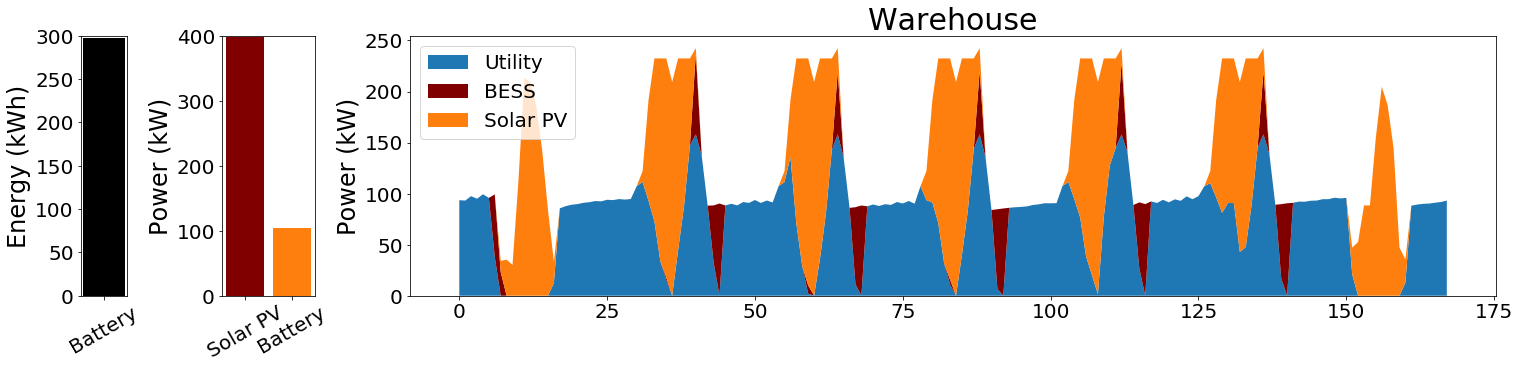

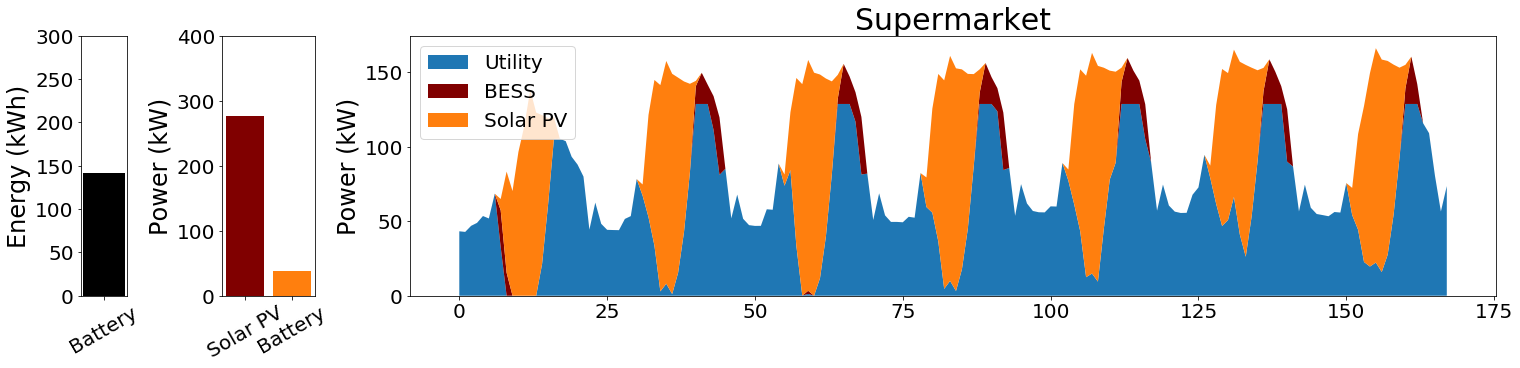

In [7]:
results_plots(results_dict)

StripMall : LCC =  1313787.0
   Capital Cost and O&M  Energy Charge  Fixed Cost  Demand Charge
1                534351         300574       53191         425671


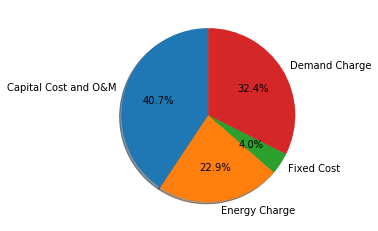

Warehouse : LCC =  1308056.0
   Capital Cost and O&M  Energy Charge  Fixed Cost  Demand Charge
1                608757         310018       53191         336089


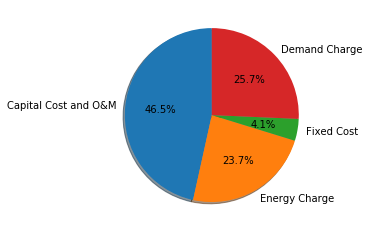

Supermarket : LCC =  1171104.0
   Capital Cost and O&M  Energy Charge  Fixed Cost  Demand Charge
1                372241         368849       53191         376823


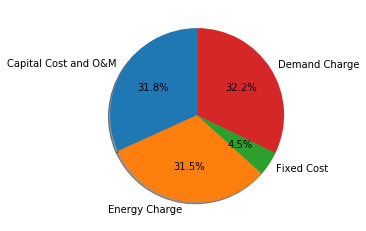

In [12]:
LCCbreakdown(results_dict)